In [1]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize

import os
import pandas as pd

In [2]:
grimms_folder = "drive/MyDrive/grimms"

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Demo: Part-of-Speech Tagging and Named Entity Recognition

In [4]:
!pip install svgling
import svgling

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 2.5 MB/s eta 0:00:00


In [24]:
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('maxent_ne_chunker_tab')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('tagsets')
from nltk.tag import pos_tag
from nltk.chunk import ne_chunk

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker_tab.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt

In [25]:
hansel_and_gretel = open(os.path.join(grimms_folder, "hansel_and_gretel.txt"), encoding="utf-8").read()

In [26]:
hansel_gretal_list = sent_tokenize(hansel_and_gretel)
hansel_gretal_list[:2]

['Hard by a great forest dwelt a poor wood-cutter with his wife and his\ntwo children.',
 'The boy was called Hansel and the girl Gretel.']

In [27]:
hansel_gretal_list = [x.replace("\n", " ") for x in hansel_gretal_list]
hansel_gretal_list[:2]

['Hard by a great forest dwelt a poor wood-cutter with his wife and his two children.',
 'The boy was called Hansel and the girl Gretel.']

In [28]:
pos = [nltk.pos_tag(nltk.word_tokenize(x)) for x in hansel_gretal_list]
pos[:1]

[[('Hard', 'NNP'),
  ('by', 'IN'),
  ('a', 'DT'),
  ('great', 'JJ'),
  ('forest', 'NN'),
  ('dwelt', 'VBD'),
  ('a', 'DT'),
  ('poor', 'JJ'),
  ('wood-cutter', 'NN'),
  ('with', 'IN'),
  ('his', 'PRP$'),
  ('wife', 'NN'),
  ('and', 'CC'),
  ('his', 'PRP$'),
  ('two', 'CD'),
  ('children', 'NNS'),
  ('.', '.')]]

In [29]:
ner_sentences = [ne_chunk(pos_tag(word_tokenize(sentence))) for sentence in hansel_gretal_list]

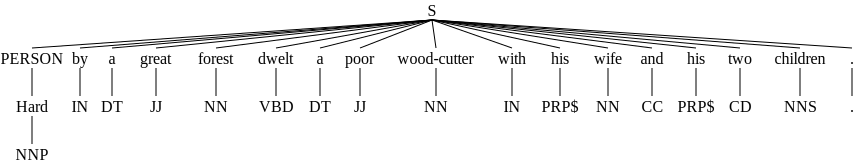

In [30]:
ner_sentences[0]

In [31]:
type(ner_sentences[0])

nltk.tree.tree.Tree

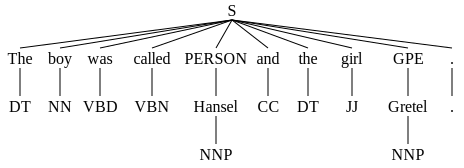

In [32]:
tree_svg = svgling.draw_tree(ner_sentences[1])
display(tree_svg)

In [33]:
subtree = ner_sentences[1][4]
print(subtree)

(PERSON Hansel/NNP)


In [45]:
ner_sentences[:4]

[Tree('S', [Tree('PERSON', [('Hard', 'NNP')]), ('by', 'IN'), ('a', 'DT'), ('great', 'JJ'), ('forest', 'NN'), ('dwelt', 'VBD'), ('a', 'DT'), ('poor', 'JJ'), ('wood-cutter', 'NN'), ('with', 'IN'), ('his', 'PRP$'), ('wife', 'NN'), ('and', 'CC'), ('his', 'PRP$'), ('two', 'CD'), ('children', 'NNS'), ('.', '.')]),
 Tree('S', [('The', 'DT'), ('boy', 'NN'), ('was', 'VBD'), ('called', 'VBN'), Tree('PERSON', [('Hansel', 'NNP')]), ('and', 'CC'), ('the', 'DT'), ('girl', 'JJ'), Tree('GPE', [('Gretel', 'NNP')]), ('.', '.')]),
 Tree('S', [('He', 'PRP'), ('had', 'VBD'), ('little', 'JJ'), ('to', 'TO'), ('bite', 'VB'), ('and', 'CC'), ('to', 'TO'), ('break', 'VB'), (',', ','), ('and', 'CC'), ('once', 'RB'), ('when', 'WRB'), ('great', 'JJ'), ('dearth', 'NN'), ('fell', 'VBD'), ('on', 'IN'), ('the', 'DT'), ('land', 'NN'), (',', ','), ('he', 'PRP'), ('could', 'MD'), ('no', 'RB'), ('longer', 'RBR'), ('procure', 'VB'), ('even', 'RB'), ('daily', 'JJ'), ('bread', 'NN'), ('.', '.')]),
 Tree('S', [('Now', 'RB'), (

In [34]:
print(subtree.leaves())

[('Hansel', 'NNP')]


In [35]:
entity_name = subtree.leaves()[0][0]
print(entity_name)

Hansel


In [36]:
entity_type = subtree.label()
print(entity_type)

PERSON


In [37]:
type(entity_name)

str

In [38]:
named_entities = {}

for sentence in ner_sentences:
  for subtree in sentence:
      if hasattr(subtree, 'label'):
          entity_name = subtree.leaves()[0][0]
          entity_type = subtree.label()

          if entity_type in named_entities:
            named_entities[entity_type].append(entity_name)
          else:
            named_entities[entity_type] = [entity_name]


print("Named Entities:", named_entities)

Named Entities: {'PERSON': ['Hard', 'Hansel', 'Hansel', 'Hansel', 'God', 'Gretel', 'Hansel', 'Hansel', 'Hansel', 'Hansel', 'Fool', 'Hansel', 'Hansel', 'Hansel', 'Hansel', 'Hansel', 'Hansel', 'Hansel', 'Hansel', 'Hansel', 'Hansel', 'Hansel', 'Hansel', 'Hansel', 'Nibble', 'Hansel', 'Hansel', 'Hansel', 'Gretel', 'Hansel', 'Gretel', 'Hansel', 'Hansel', 'Hansel', 'Hansel', 'Gretel', 'Gretel', 'Hansel', 'Hansel', 'Gretel', 'Hansel', 'Hansel', 'Hansel', 'Hansel', 'Hansel'], 'GPE': ['Gretel', 'Gretel', 'Hansel', 'Gretel', 'Gretel', 'Pay', 'Gretel', 'Gretel', 'Gretel', 'Gretel', 'Gretel', 'Gretel', 'Gretel', 'Gretel', 'Gretel', 'Gretel', 'Hansel', 'Gretel', 'Hansel', 'Gretel', 'Gretel', 'Gretel', 'Scream', 'Gretel', 'Gretel', 'Gretel', 'Gretel', 'Gretel', 'Gretel', 'Gretel', 'Hansel', 'Gretel', 'Gretel', 'Gretel', 'Gretel']}


In [39]:
type(named_entities)

dict

In [40]:
from collections import Counter

person_counts = Counter(named_entities.get('PERSON', []))

# Display the result
print("Person Counts:", person_counts)

Person Counts: Counter({'Hansel': 35, 'Gretel': 6, 'Hard': 1, 'God': 1, 'Fool': 1, 'Nibble': 1})


In [41]:
entities = []
types = []
counts = []

for entity_type in named_entities:
    names = named_entities[entity_type]
    name_counts = Counter(names)
    for name in name_counts:
        entities.append(name)
        types.append(entity_type)
        counts.append(name_counts[name])


In [42]:
entities_df = pd.DataFrame({
    'Entity': entities,
    'Type': types,
    'Count': counts
})

entities_df = entities_df.sort_values(by='Count', ascending=False).reset_index(drop=True)

entities_df

,Entity,Type,Count
0,Hansel,PERSON,35
1,Gretel,GPE,29
2,Gretel,PERSON,6
3,Hansel,GPE,4
4,Hard,PERSON,1
5,God,PERSON,1
6,Fool,PERSON,1
7,Nibble,PERSON,1
8,Pay,GPE,1
9,Scream,GPE,1


## Exercise: Using your own text data, calculate the most common named entity and it's type.

In [43]:
for index,row in entities_df.iterrows():
  if row['Count'] == entities_df['Count'].max():
    print(row["Entity"], row["Type"])


Hansel PERSON


In [44]:
entity_counts = Counter()
entity_types = {}

for entity_type in named_entities:
    names = named_entities[entity_type]
    for name in names:
        entity_counts[name] += 1
        if name not in entity_types:
            entity_types[name] = entity_type

top_entity = max(entity_counts, key=entity_counts.get)
count = entity_counts[top_entity]
print(top_entity, count)

Hansel 39
